Keras: Preparing Data

#Connect to Python 3.10 - Pytorch and Tensorflow kernel

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as Keras_backend
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

In [4]:
# Workaround for Keras issues on Mac computers (you can comment this
# out if you're not on a Mac, or not having problems)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
# Make a File_Helper for saving and loading files.

save_files = False

import os
import matplotlib.pyplot as plt

# Define File_Helper class locally to avoid importing it from a separate file, which can cause issues in Jupyter notebooks.
class File_Helper:
    """Utility class for saving and loading files."""
    
    def __init__(self, really_save_files=True):
        self.really_save_files = really_save_files
        self.saved_output_dir = 'saved_output'
        self.input_data_dir = 'input_data'
        self.saved_models_dir = 'saved_models'
        self.saved_weights_dir = 'saved_weights'
    
    def get_input_file_path(self, filename):
        """Get the local path to the input file."""
        return self.input_data_dir + '/' + filename
    
    def check_for_directory(self, directory, create_if_needed=True):
        """Check if directory exists, optionally create it."""
        path_exists = os.path.exists(directory)
        if path_exists:
            if not os.path.isdir(directory):
                raise Exception(f'Found {directory} but it is a file, not a directory')
            return True
        if create_if_needed:
            os.makedirs(directory)
        return path_exists
    
    def save_figure(self, filename):
        """Save the figure."""
        if self.really_save_files and (filename != None):
            self.check_for_directory(self.saved_output_dir)
            plt.savefig(self.saved_output_dir+'/'+filename+'.png', dpi=300, bbox_inches='tight')
    
    def get_saved_output_dir(self):
        return self.saved_output_dir
    
    def get_input_data_dir(self):
        return self.input_data_dir
    
    def get_saved_weights_dir(self):
        return self.saved_weights_dir
    
    def get_saved_models_dir(self):
        return self.saved_models_dir

file_helper = File_Helper(save_files)

In [16]:
# reshape a Python array using reshape() called from NumPy
demoData = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
newData = np.reshape(demoData, (6, 2))
print(newData)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [17]:
# reshape a NumPy array by calling reshape() as one of its methods
demoData = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
newData = demoData.reshape((6, 2))
print(newData)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [19]:
# reshaping to an incompatible size causes an error
demoData = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
# uncomment the next line to see the error
demoData.reshape((5,15))

ValueError: cannot reshape array of size 12 into shape (5,15)

In [20]:
random_seed = 42
np.random.seed(random_seed)

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = Keras_backend.cast_to_floatx(X_train)
X_test = Keras_backend.cast_to_floatx(X_test)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# save the original y_train and y_test
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
def show_demo_grid(seed, filename):
    # Show a grid of random digits
    demo_grid = [[[] for x in range(10)] for y in range(10)] 
    num_found = 0
    attempts = 0
    np.random.seed(seed)
    while (num_found < 100) and (attempts < X_train.shape[0]):
        attempts += 1
        index = np.random.randint(0, X_train.shape[0])
        label = original_y_train[index]
        placed = False
        for column in range(10):
            if (not placed) and (not demo_grid[label][column]):
                num_found += 1
                demo_grid[label][column] = index
                placed = True

    plt.figure(figsize=(20,20))
    for y in range(10):
        for x in range(10):
            plt.subplot(10, 10, 1 + (y*10) + x)
            list_index = demo_grid[y][x]
            img = X_train[list_index].reshape(28, 28)
            plt.imshow(img, cmap=plt.get_cmap('gray'))
            frame = plt.gca()
            frame.axes.get_xaxis().set_visible(False)
            frame.axes.get_yaxis().set_visible(False)
    file_helper.save_figure(filename)
    plt.show()

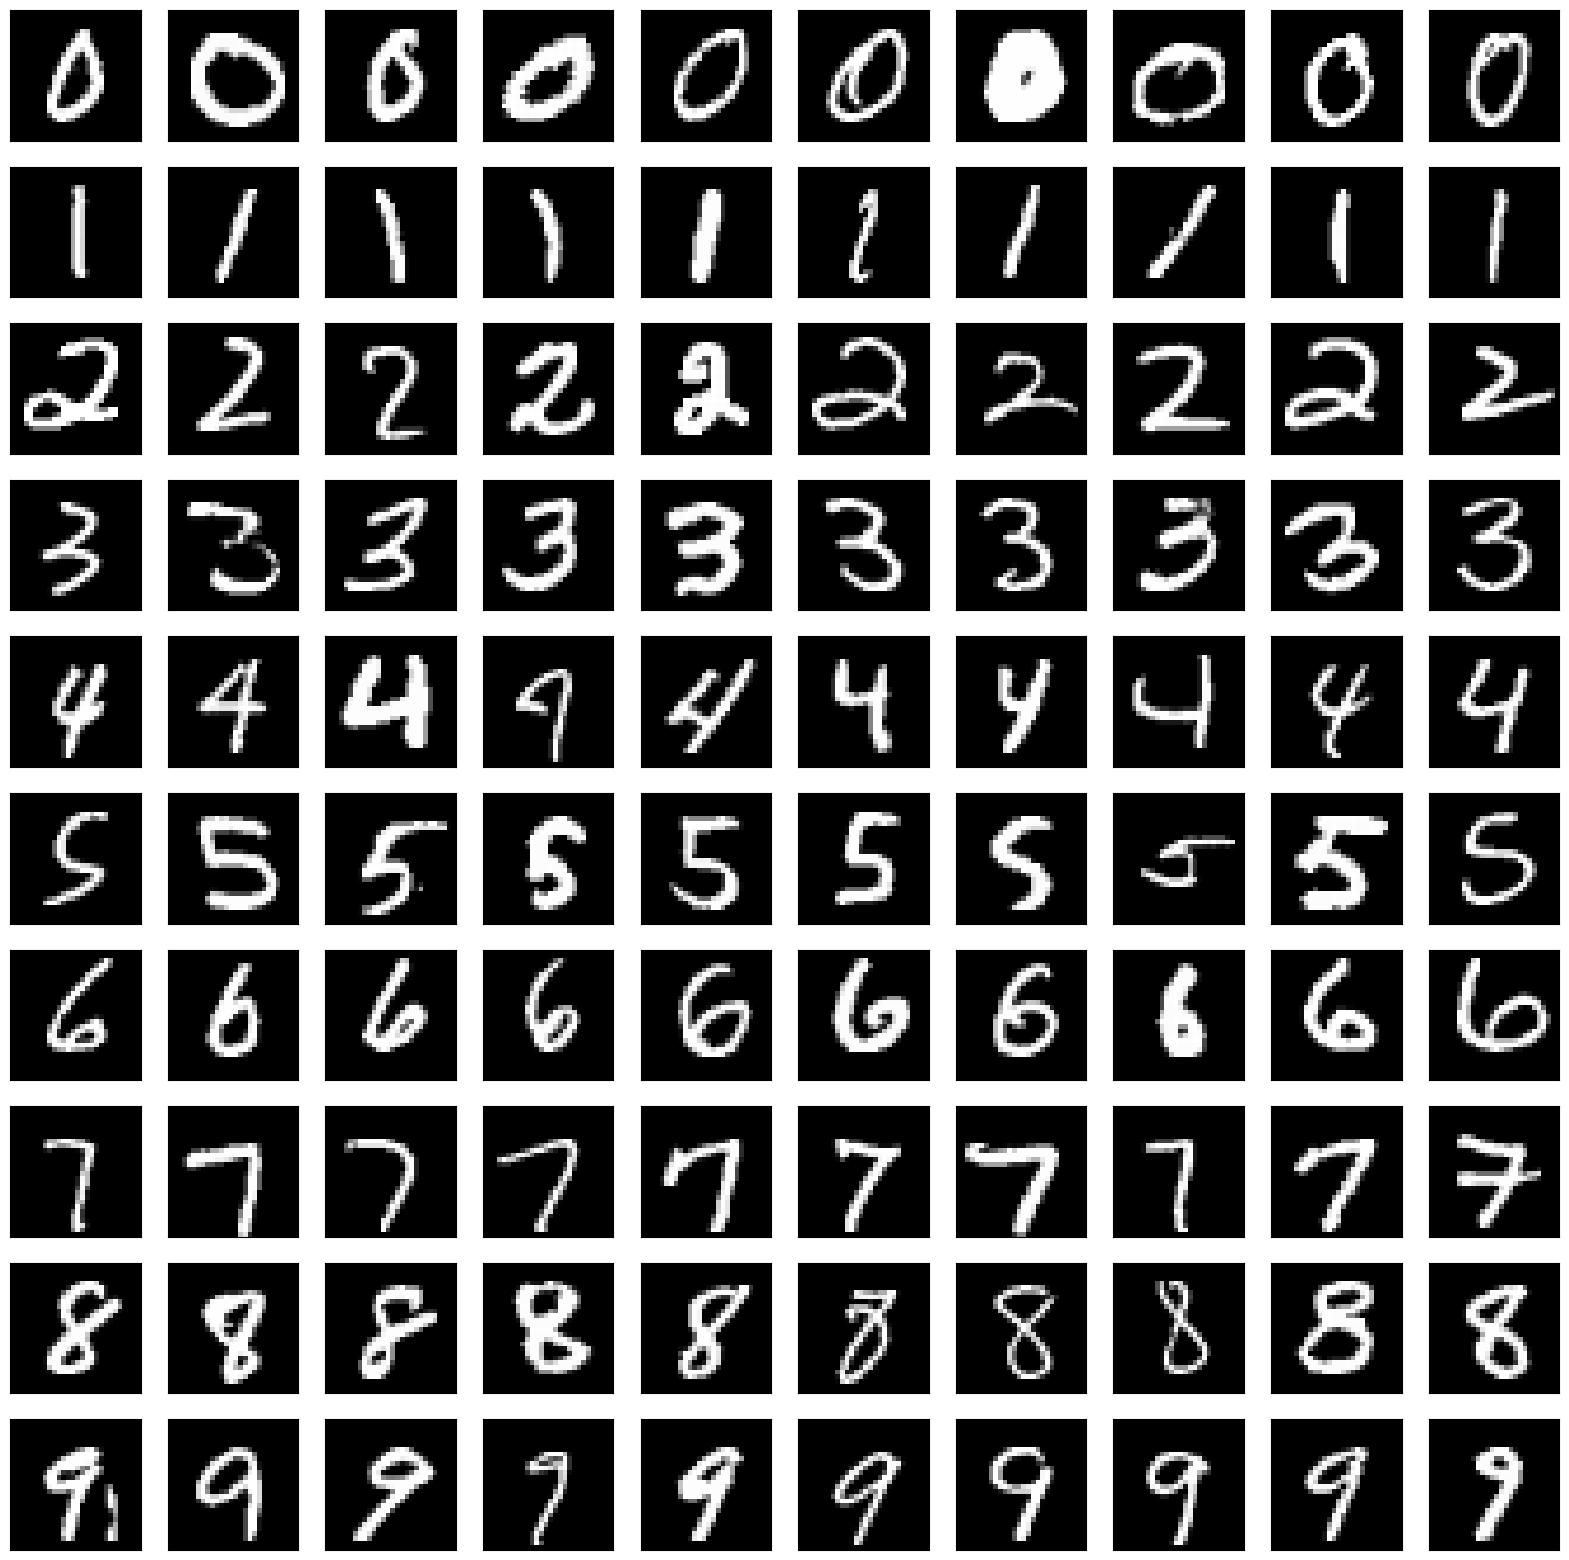

In [22]:
show_demo_grid(5, 'MNIST-demo')

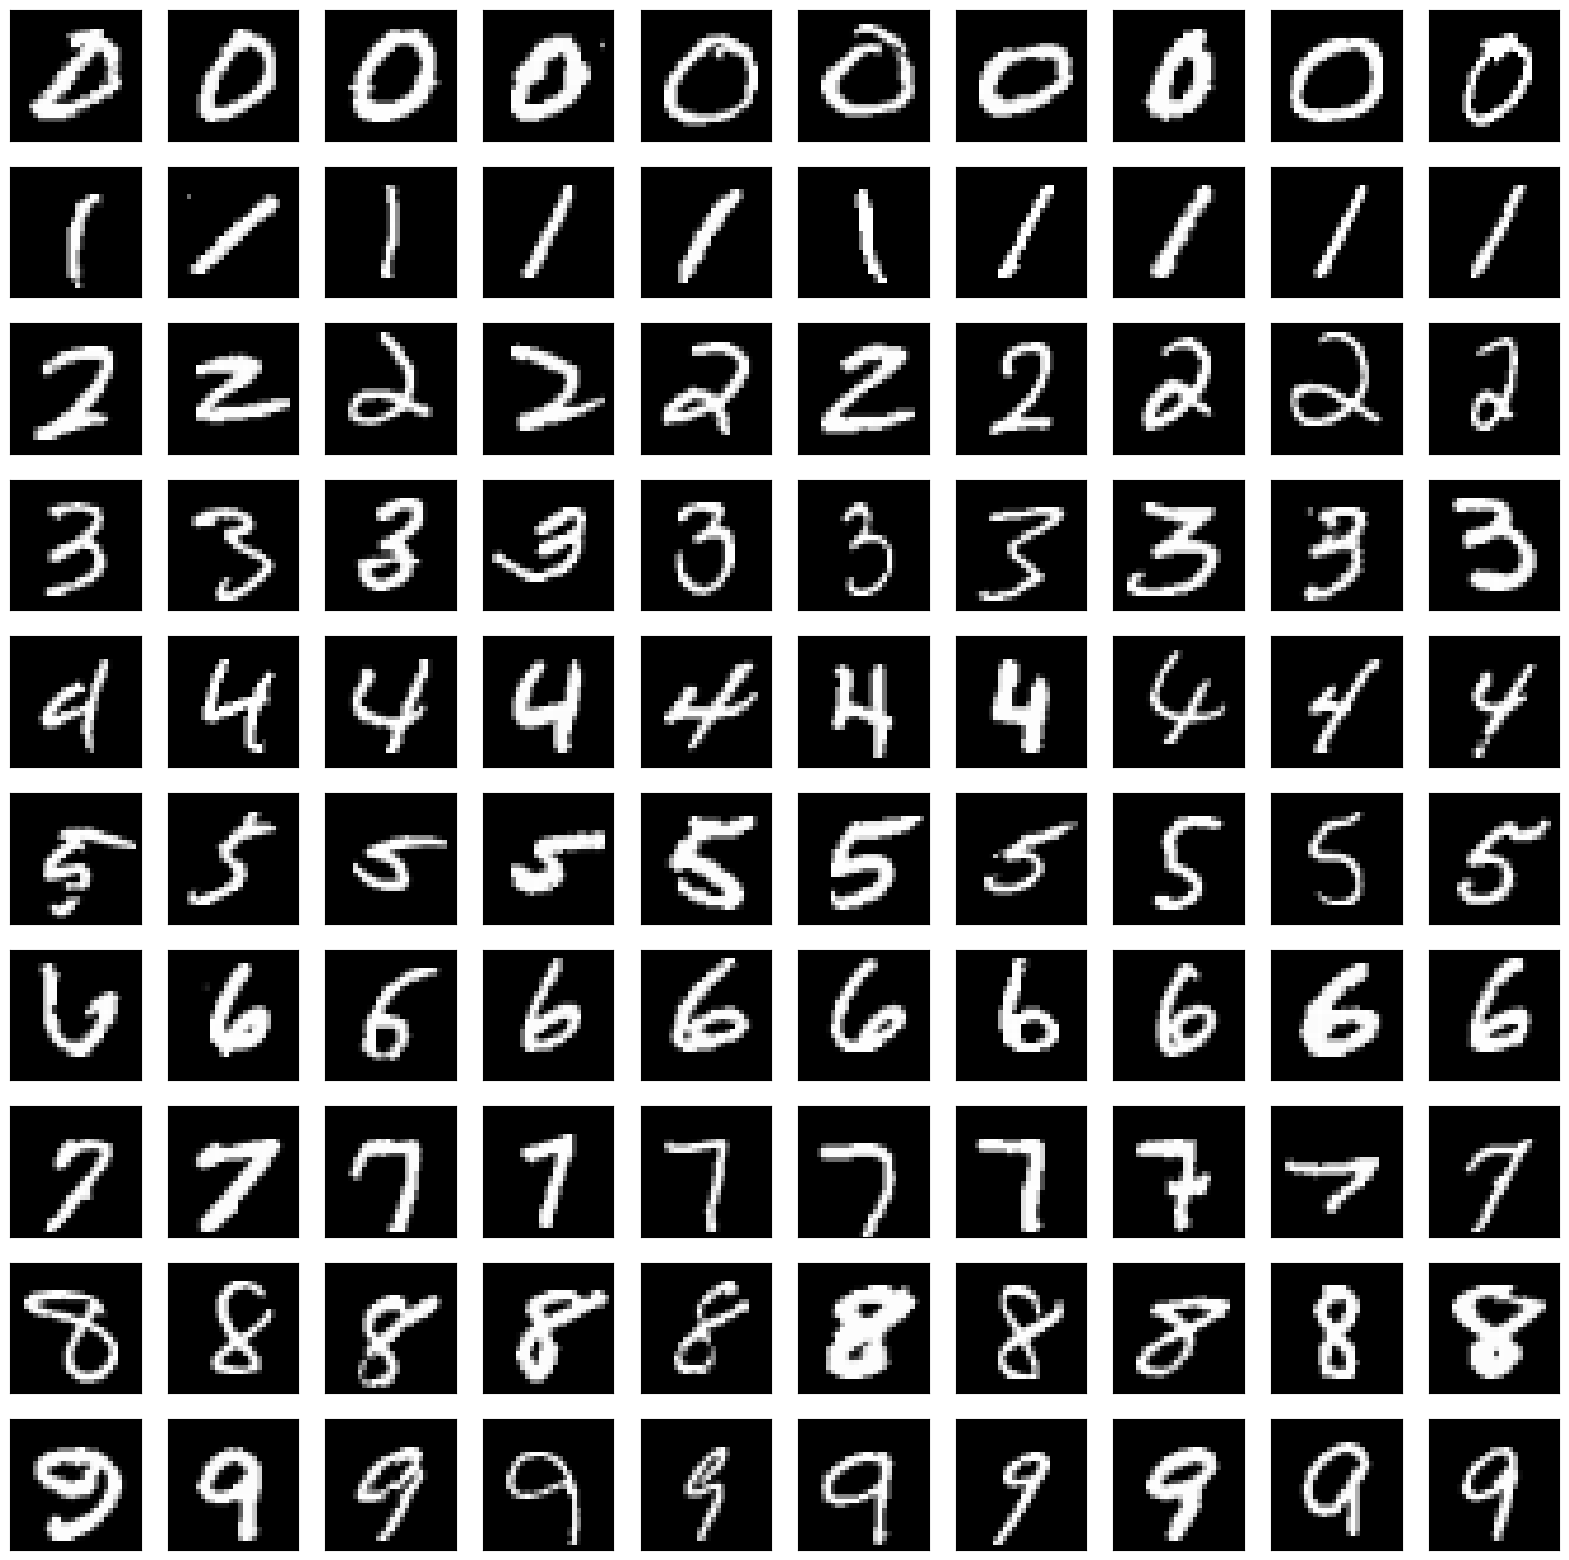

In [23]:
show_demo_grid(42, 'MNIST-demo2')

In [24]:
# show a set of training digits in 10-column form
def showset(setlist, filename = None):
    num_columns = 10 
    num_rows = int(len(setlist)/num_columns)
    plt.figure(figsize=(num_columns, num_rows))
    plt.subplots_adjust(hspace=0.4)
    for index in range(len(setlist)):
        y = int(index/num_columns)
        x = index - (y*num_columns)
        ax = plt.subplot(num_rows, num_columns, 1 + index)
        img = X_train[setlist[index]].reshape(28, 28)
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        ax.axis("off")
        plt.title(str(setlist[index])+','+str(np.argmax(y_train[setlist[index]])))
        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    file_helper.save_figure(filename)
    fig = plt.gcf()
    fig.tight_layout()
    plt.show()
    

# I built up these lists by hand while looking through the training set
confusing = ( 8689, 51176, 50994, 3370, 
            4986, 4522, 57380, 9472, 140, 494, 
            56569, 54975,
            54834, 56286,
            11711, 14335, 15324, 15434, 15862, 
            40664, 50239, 50856, 
            16676, 26398, 26624, 27514, 29897, 
            40876, 52074, 53638)

cropped = ( 12184, 3089, 3002, 9363, 2231, 26447,
           28491, 500, 5052, 55475, 
           #6498, 6506,
          #7142, 7434, 517, 875, 957, 1101, 2135,
          #10124, 16192, 16938, 20446, 25692, 873, 
          #50391, 52514, 4761, 53006, 53248, 56678 
          )

noisy = ( 51323, 51363, 51459, 53205, 55539, 
         26471, 25159,7599, 10677, 58871,
         #2595, 3163, 3867, 5009, 9139, 1875, 7329,
        #7947, 8675, 9395, 451, 67, 933, 1023, 1165, 1157,
        #1623, 1677, 10251, 10867, 11853, 12113, 12123,
        #26391, 40977, 2693, 29437, 
        #58797, 13259, 14929, 15309, 16275,  25801, 27793,
        #40159, 50459, 51863, 52253, 54085, 55285, 56659, 
        #58801, 15963,  3065, 
        )

edged = ( 2492, 4880, 3442, 11947, 7195, 4759, 3382, 2133, 
         7192, 2380, 
         #3349, 3599, 3991, 
        #4396, 3894, 5892, 5893, 5897, 7198, 
        #8990, 8991, 11894, 11898, 3835, 12599 
        )

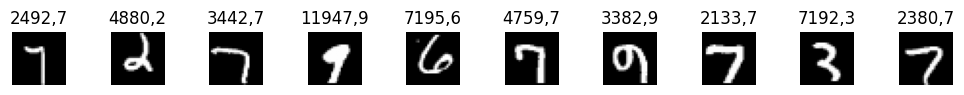

In [25]:
showset(edged, 'MNIST-edged')

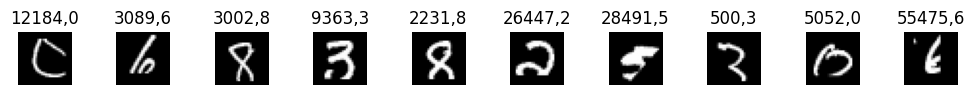

In [26]:
showset(cropped, 'MNIST-miscropped')

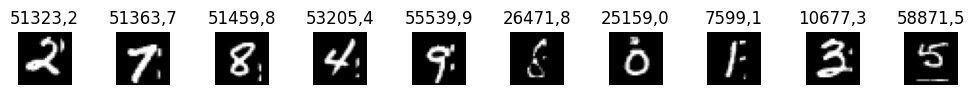

In [27]:
showset(noisy, 'MNIST-noisy')

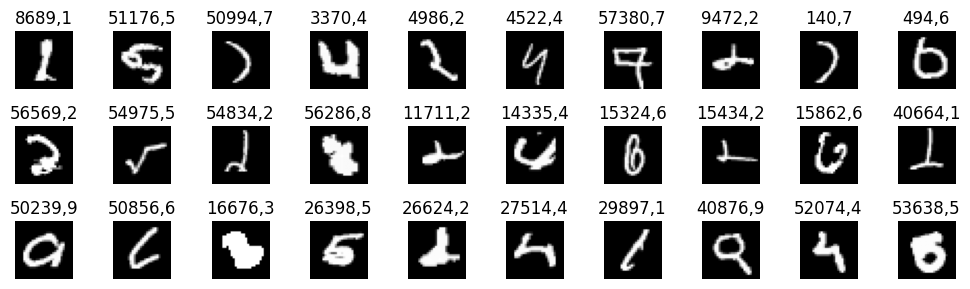

In [28]:
showset(confusing, 'MNIST-confusing')

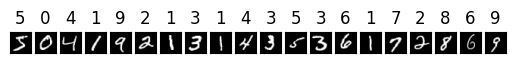

In [31]:
# Show the first few images
num_images = 20
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(original_y_train[i])
    plt.xticks([],[])
    plt.yticks([],[])
file_helper.save_figure('MNIST-first-few')
plt.show()

In [32]:
one_hot = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
print("one_hot represents the integer ",one_hot.index(1))

one_hot represents the integer  3


In [33]:
one_hot_np = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
print("one_hot_np represents the integer ",np.argmax(one_hot_np))

one_hot_np represents the integer  3
